# Quantum Battery in Qubit = 2

Milou van Nederveen

Quantum Inspire Starmon-5

Dates of experiments: 12/12, 13/12

In [44]:
import numpy as np
import os

from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer
from IPython.display import display, Math, Latex

from quantuminspire.credentials import get_authentication
from quantuminspire.api import QuantumInspireAPI
from quantuminspire.qiskit import QI
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')

authentication = get_authentication()
#authentication = set_authentication('api',QI_URL)
QI.set_authentication(authentication, QI_URL)

backend = QI.get_backend('Starmon-5')

font = {'family':'serif'}

In [2]:
def finding_value(counts,qubit,shots):
    total = 0
    if qubit == 0:
        for binary_string, number in counts.items():
            if binary_string[4] == '1':
                total += number
    if qubit == 1:
        for binary_string, number in counts.items():
             if binary_string[3] == '1':
                total += number
    if qubit == 2:
        for binary_string, number in counts.items():
             if binary_string[2] == '1':
                total += number
    if qubit == 3:
        for binary_string, number in counts.items():
             if binary_string[1] == '1':
                total += number
    if qubit == 4:
        for binary_string, number in counts.items():
             if binary_string[0] == '1':
                total += number
    return total/shots

In [7]:
dataF=[]

In [8]:
theta = np.linspace(0, np.pi, 16)
num_datapoints = 10
shots = 1024
y_values = []
qubit=2

for i in range(num_datapoints):
    for t in theta:
        qr = QuantumRegister(5)
        cr = ClassicalRegister(5)
        qc = QuantumCircuit(qr,cr)
    
        qc.rx(t,qubit)
        qc.measure(qr[qubit],cr[qubit])
    
        job = backend.run(qc,shots)
        counts = job.result().get_counts()
    
        y = finding_value(counts,qubit,shots)
        y_values.append(y)
    
    print(y_values)
    dataF.append([y_values])
    y_values=[]

[0.00390625, 0.015625, 0.0478515625, 0.099609375, 0.1513671875, 0.21484375, 0.3505859375, 0.443359375, 0.544921875, 0.63671875, 0.748046875, 0.828125, 0.86328125, 0.92578125, 0.96484375, 0.97265625]
[0.0, 0.0146484375, 0.0546875, 0.1015625, 0.1337890625, 0.21484375, 0.3310546875, 0.423828125, 0.548828125, 0.640625, 0.744140625, 0.8271484375, 0.8818359375, 0.9208984375, 0.9541015625, 0.9697265625]
[0.001953125, 0.021484375, 0.0458984375, 0.095703125, 0.150390625, 0.21875, 0.3154296875, 0.447265625, 0.5400390625, 0.6552734375, 0.7705078125, 0.8369140625, 0.88671875, 0.93359375, 0.9619140625, 0.9775390625]
[0.0029296875, 0.0146484375, 0.0439453125, 0.125, 0.15234375, 0.2333984375, 0.3134765625, 0.4462890625, 0.541015625, 0.685546875, 0.7373046875, 0.806640625, 0.8701171875, 0.921875, 0.9541015625, 0.9765625]
[0.0029296875, 0.0205078125, 0.056640625, 0.0947265625, 0.1513671875, 0.23828125, 0.3505859375, 0.4462890625, 0.5703125, 0.6630859375, 0.7646484375, 0.8369140625, 0.841796875, 0.92968

In [11]:
dataF=[[[0.00390625, 0.015625, 0.0478515625, 0.099609375, 0.1513671875, 0.21484375, 0.3505859375, 0.443359375, 0.544921875, 0.63671875, 0.748046875, 0.828125, 0.86328125, 0.92578125, 0.96484375, 0.97265625]], [[0.0, 0.0146484375, 0.0546875, 0.1015625, 0.1337890625, 0.21484375, 0.3310546875, 0.423828125, 0.548828125, 0.640625, 0.744140625, 0.8271484375, 0.8818359375, 0.9208984375, 0.9541015625, 0.9697265625]], [[0.001953125, 0.021484375, 0.0458984375, 0.095703125, 0.150390625, 0.21875, 0.3154296875, 0.447265625, 0.5400390625, 0.6552734375, 0.7705078125, 0.8369140625, 0.88671875, 0.93359375, 0.9619140625, 0.9775390625]], [[0.0029296875, 0.0146484375, 0.0439453125, 0.125, 0.15234375, 0.2333984375, 0.3134765625, 0.4462890625, 0.541015625, 0.685546875, 0.7373046875, 0.806640625, 0.8701171875, 0.921875, 0.9541015625, 0.9765625]], [[0.0029296875, 0.0205078125, 0.056640625, 0.0947265625, 0.1513671875, 0.23828125, 0.3505859375, 0.4462890625, 0.5703125, 0.6630859375, 0.7646484375, 0.8369140625, 0.841796875, 0.9296875, 0.9599609375, 0.9658203125]], [[0.00390625, 0.017578125, 0.0439453125, 0.091796875, 0.1455078125, 0.2060546875, 0.328125, 0.443359375, 0.5419921875, 0.6611328125, 0.7685546875, 0.8447265625, 0.8623046875, 0.93359375, 0.951171875, 0.98046875]], [[0.0029296875, 0.01953125, 0.056640625, 0.1083984375, 0.1376953125, 0.2412109375, 0.3515625, 0.4423828125, 0.5830078125, 0.6298828125, 0.7509765625, 0.8408203125, 0.8837890625, 0.9306640625, 0.955078125, 0.9755859375]], [[0.001953125, 0.0126953125, 0.0517578125, 0.130859375, 0.1416015625, 0.2236328125, 0.3095703125, 0.42578125, 0.541015625, 0.66796875, 0.74609375, 0.8271484375, 0.876953125, 0.947265625, 0.9716796875, 0.9765625]], [[0.0009765625, 0.0205078125, 0.0439453125, 0.0947265625, 0.1376953125, 0.232421875, 0.333984375, 0.4150390625, 0.52734375, 0.66015625, 0.7685546875, 0.8486328125, 0.875, 0.92578125, 0.9765625, 0.9736328125]], [[0.001953125, 0.0166015625, 0.0498046875, 0.126953125, 0.15234375, 0.2392578125, 0.3544921875, 0.4365234375, 0.529296875, 0.6630859375, 0.751953125, 0.837890625, 0.875, 0.927734375, 0.9697265625, 0.9765625]]]

## Plotting the raw data

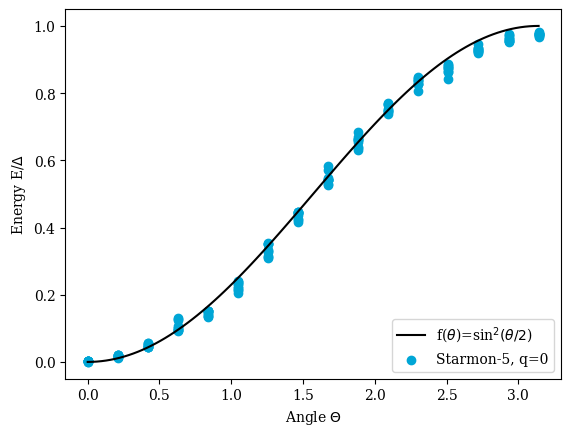

In [15]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

for i in range(len(dataF)):
    plt.scatter(theta,dataF[i],color=tud_color)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=0"], prop=font, loc="lower right")
plt.show()

## Mean value and Errors

In [26]:
#transpose the data, such that each column contains data respective of the angle
dataT=np.array(dataF)
data = dataT.transpose()

In [38]:
#Mean Value
mean_values = []
for t in range(len(theta)):
    mean_values.append(np.mean(data[t])) 
    
print('Mean values:', mean_values)

Mean values: [0.00234375, 0.0173828125, 0.04951171875, 0.10693359375, 0.14541015625, 0.22626953125, 0.33388671875, 0.43701171875, 0.54677734375, 0.65634765625, 0.755078125, 0.83349609375, 0.8716796875, 0.9296875, 0.9619140625, 0.97451171875]


In [37]:
#Standard Deviation
std_dev=[]
for t in range(len(theta)):
    std_dev.append(np.std(data[t])) 

print('Standard Deviation:', std_dev)

Standard Deviation: [0.001171875, 0.002857175554360897, 0.004922688734815844, 0.014274190614539072, 0.00678623111448894, 0.011653873150133996, 0.016384437229431937, 0.010815181686279087, 0.016407703153650734, 0.015652137079057337, 0.011336540516352696, 0.011323493800096342, 0.012568476986872008, 0.007162937820661034, 0.008170508071621832, 0.004013422380475491]


In [36]:
#Standard Error
std_err=[]

for t in range(len(theta)):
    std_err.append(np.std(data[t]) / np.sqrt(np.size(data[t])))
    
print('Standard Error:', std_err)

Standard Error: [0.00037057941330098193, 0.0009035182426734669, 0.0015566908614070686, 0.004513895409734205, 0.002145994705008794, 0.003685278271710483, 0.005181213982506371, 0.0034200607437182536, 0.005188571313746398, 0.004949640341899616, 0.0035849288818455833, 0.0035808031479099807, 0.003974501399792573, 0.0022651198251451565, 0.002583741514711514, 0.0012691555934597443]


In [52]:
#Maximum values 
max_values = []
for t in range(len(theta)):
    max_values.append(np.max(data[t])) 
print('Maximum values:',max_values)
    
#Minimum values
min_values = []
for t in range(len(theta)):
    min_values.append(np.min(data[t])) 
print('Minimum values:',min_values)


Maximum values: [0.00390625, 0.021484375, 0.056640625, 0.130859375, 0.15234375, 0.2412109375, 0.3544921875, 0.447265625, 0.5830078125, 0.685546875, 0.7705078125, 0.8486328125, 0.88671875, 0.947265625, 0.9765625, 0.98046875]
Minimum values: [0.0, 0.0126953125, 0.0439453125, 0.091796875, 0.1337890625, 0.2060546875, 0.3095703125, 0.4150390625, 0.52734375, 0.6298828125, 0.7373046875, 0.806640625, 0.841796875, 0.9208984375, 0.951171875, 0.9658203125]


## Plot mean value with error bars

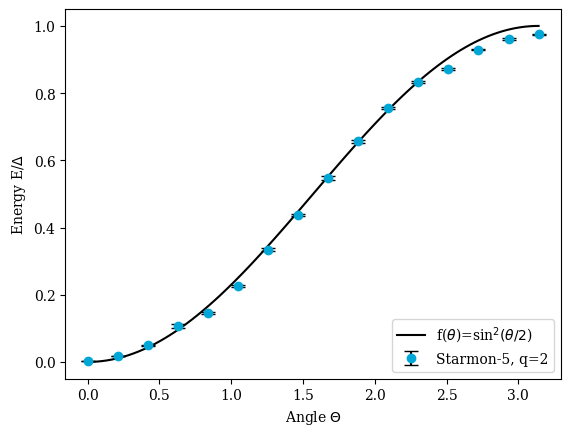

<Figure size 640x480 with 0 Axes>

In [40]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')
#plt.scatter(theta, mean_values,color=tud_color)

#plot error bars with stdev here
plt.errorbar(theta, mean_values, yerr=std_err, fmt='o', color=tud_color, ecolor='black', capsize=5)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=2"], prop=font, loc="lower right")
plt.show()
plt.savefig('starmon-5-q2-error-stdev.png')

In [43]:
max(mean_values)

0.97451171875

## Fit function

In [45]:
def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

In [46]:
guess = [0.9999, 0]
xdata=theta
ydata=mean_values

parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)

fit_a = parameters[0]
fit_b = parameters[1]

In [47]:
print(fit_a)
print(fit_b)

0.9887970966750064
-0.10480004808192273


In [48]:
fit_sin2 = sin2_func(xdata, fit_a, fit_b)

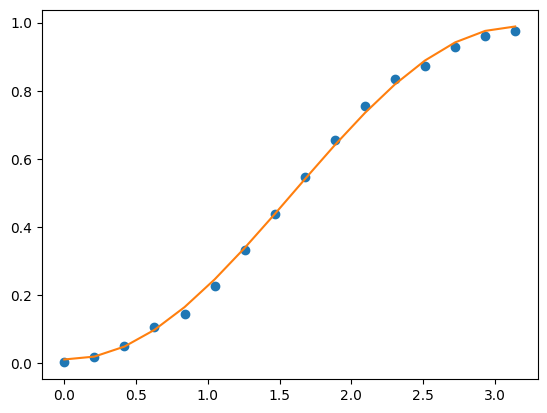

In [49]:
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_sin2 , '-', label='fit')

In [50]:
SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of phi is {fit_b:.5f} with standard error of {SE_b:.5f}.')

The value of a is 0.98880 with standard error of 0.00478.
The value of phi is -0.10480 with standard error of 0.05339.


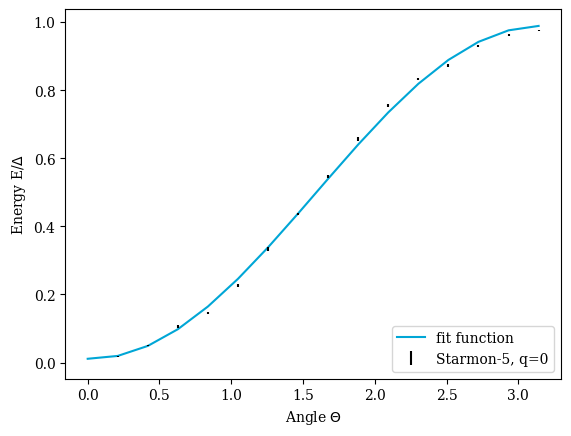

In [51]:
plt.plot(xdata, fit_sin2 , '-', label='fit',color=tud_color)
plt.errorbar(theta, mean_values, yerr=std_err, fmt='none',ecolor='black')


plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)
plt.legend(["fit function", "Starmon-5, q=0"], prop=font, loc="lower right")

plt.savefig('starmon-5-q2-fit.png')